# Plotting system's state evolution in phase space
Code for Analytical Mechanics Final Project - "Introduction to Hamiltonian Mechanics"

In [41]:
from pylab import *
import numpy as np
import imageio
import matplotlib.pyplot as plt
import os

## Simple Harmonic Oscillator

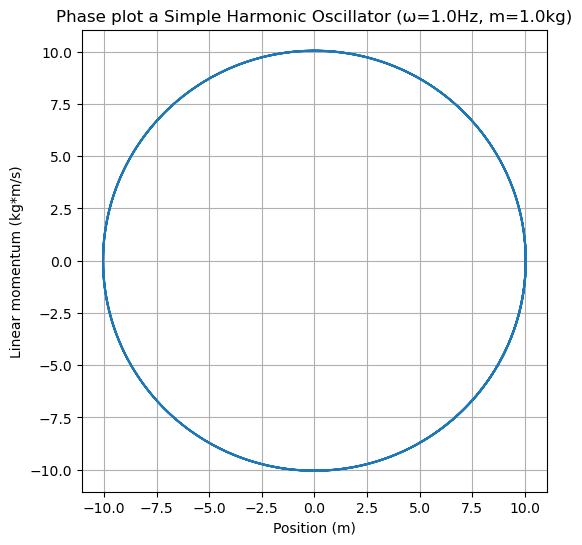

"# Plot energy\nplot(range(len(energies)), energies)\nxlabel('Steps')\nylabel('Total Energy')\ntitle('Total Energy Over Time')\ngrid()\nshow()\n"

In [132]:
# Define constants
w = 1.0  # natural frequency of the spring √(k/m) (rad/s)
m = 1.0  # mass of oscillator
dt = 0.01  # time step for simulation

# Initialize global variables
def initialize(x0, p0):
    global x, p, x_result, p_result
    x = x0  # Initial position (m)
    p = p0  # Initial momentum (kg*m/s)
    x_result = [x]
    p_result = [p]

# Store current state in result arrays
def observe():
    global x, p, x_result, p_result
    x_result.append(x)
    p_result.append(p)

# Symplectic Leapfrog Integrator
def update():
    global x, p, x_result, p_result
    p = p - 0.5 * m * (w**2) * x * dt  # Half-step momentum update
    x = x + (p / m) * dt               # Full-step position update
    p = p - 0.5 * m * (w**2) * x * dt  # Final half-step momentum update

# Energy calculation
def energy(x, p):
    return 0.5 * m * (w**2) * x**2 + 0.5 * (p**2) / m

# Main simulation loop
def simulate_SHO(steps, x0, p0):
    initialize(x0, p0)
    energies = []
    for _ in range(steps):
        update()
        observe()
        energies.append(energy(x, p))
    return x_result, p_result, energies

# Parameters for simulation
x0 = 10.0  # Initial position (m)
v0 = 1.0  # Initial velocity (m/s)
p0 = m * v0  # Initial momentum (kg*m/s)
steps = 2000  # Number of simulation steps

# Run the simulation
x_result, p_result, energies = simulate_SHO(steps, x0, p0)

# Plot phase space diagram
plt.figure(figsize=(6, 6))
plt.plot(x_result, p_result)
xlabel('Position (m)')
ylabel('Linear momentum (kg*m/s)')
title(f'Phase plot a Simple Harmonic Oscillator (ω={w}Hz, m={m}kg)')
grid()
show()

'''# Plot energy
plot(range(len(energies)), energies)
xlabel('Steps')
ylabel('Total Energy')
title('Total Energy Over Time')
grid()
show()
'''

## Pendulum

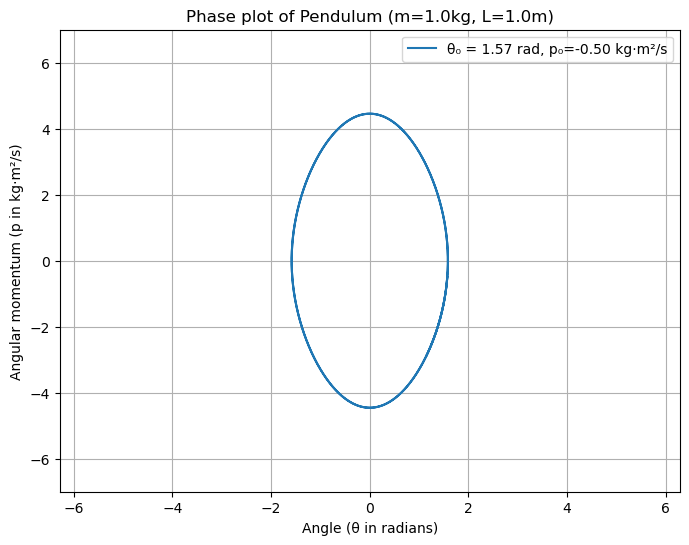

"# Plot total energy over time\nplt.figure()\nplt.plot(energies)\nplt.xlabel('Steps')\nplt.ylabel('Energy (J)')\nplt.title('Total Energy Over Time')\nplt.grid()\nplt.show()\n"

In [203]:
# Define constants
m = 1.0  # mass (kg)
g = 9.8  # gravitational acceleration (m/s^2)
l = 1.0  # length of pendulum (m)
dt = 0.001  # time step for simulation (reduced for better accuracy)

# Initialize global variables
def initialize(theta0, p0):
    global theta, p, theta_result, p_result
    theta = theta0  # Initial angle (radians)
    p = p0  # Initial angular momentum
    theta_result = [theta]
    p_result = [p]

# Store current state in result arrays
def observe():
    global theta, p, theta_result, p_result
    theta_result.append(theta)
    p_result.append(p)

# Calculate total energy
def energy(theta, p):
    return (p**2) / (2 * m * l**2) + m * g * l * (1 - np.cos(theta))

# Symplectic Leapfrog Update
def update():
    global theta, p
    # Half-step for angular momentum
    p_half = p - 0.5 * m * g * l * np.sin(theta) * dt
    # Full-step for angle
    theta = theta + (p_half / (m * l**2)) * dt
    # Final half-step for angular momentum
    p = p_half - 0.5 * m * g * L * np.sin(theta) * dt

# Main simulation loop
def simulate_pendulum(steps, theta0, p0):
    initialize(theta0, p0)
    energies = []
    for _ in range(steps):
        update()
        observe()
        energies.append(energy(theta, p))
    return theta_result, p_result, energies

# Parameters for simulation
theta0 = 0.5 * np.pi  # Initial angle (in radians)
p0 = -0.5             # Initial angular momentum
steps = 5000          # Number of simulation steps

# Run the simulation
theta_result, p_result, energies = simulate_pendulum(steps, theta0, p0)

# Plot phase space diagram
plt.figure(figsize=(8, 6))
plt.plot(theta_result, p_result, label=f"θ₀ = {theta0:.2f} rad, p₀={p0:.2f} kg·m²/s")
plt.xlim(-2 * np.pi, 2 * np.pi)
plt.ylim(-7, 7)
plt.xlabel('Angle (θ in radians)')
plt.ylabel('Angular momentum (p in kg·m²/s)')
plt.title(f'Phase plot of Pendulum (m={m}kg, L={l}m)')
plt.grid()
plt.legend()
plt.show()

'''# Plot total energy over time
plt.figure()
plt.plot(energies)
plt.xlabel('Steps')
plt.ylabel('Energy (J)')
plt.title('Total Energy Over Time')
plt.grid()
plt.show()
'''

## GIF Generator
### Pendulum's phase plot change as initial theta changes (ω₀=0)
You can see how the pendulum deviates from simple harmonic motion as the initial angle incrases.

In [205]:
# Create folder for frames
output_folder = "pendulum_frames"
os.makedirs(output_folder, exist_ok=True)


# Define range of initial angles and angular momentum
initial_L = 0  # Keep angular momentum constant
theta_values = np.linspace(0, np.pi, 30)  # Vary initial theta

theta_min, theta_max = -np.pi, np.pi
L_min, L_max = -7,7

# Generate frames
frames = []
for theta0 in theta_values:
    theta_result, L_result, _ = simulate_pendulum(steps, theta0, initial_L)
    
    # Plot phase space
    plt.figure(figsize=(6, 4))
    plt.plot(theta_result, L_result, label=f"θ₀ = {theta0:.2f} rad, L₀=0 kg*m/s")
    plt.xlabel('Angle (θ in radians)')
    plt.ylabel('Angular Momentum (L in kg*m/s)')
    plt.title('Phase Space Diagram of a Pendulum')
    plt.legend()
    plt.grid()
    
    # Fix axis bounds
    plt.xlim(theta_min, theta_max)
    plt.ylim(L_min, L_max)
    
    # Save frame to folder
    filename = os.path.join(output_folder, f"frame_{theta0:.2f}.png")
    plt.savefig(filename)
    frames.append(filename)
    plt.close()

# Create a GIF
gif_filename = "pendulum_phase_space_[0,π]_releasefromrest.gif"
with imageio.get_writer(gif_filename, mode='I', duration=0.2) as writer:
    for frame in frames:
        image = imageio.imread(frame)
        writer.append_data(image)

print(f"GIF created: {gif_filename}")


/var/folders/tt/s2x_49zj51l148464ppq14rm0000gn/T/ipykernel_15431/3508571101.py:41: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(frame)


GIF created: pendulum_phase_space_[0,π]_releasefromrest.gif


# Phase Space Streamplots showing general trajectories

## Simple Harmonic Oscillator

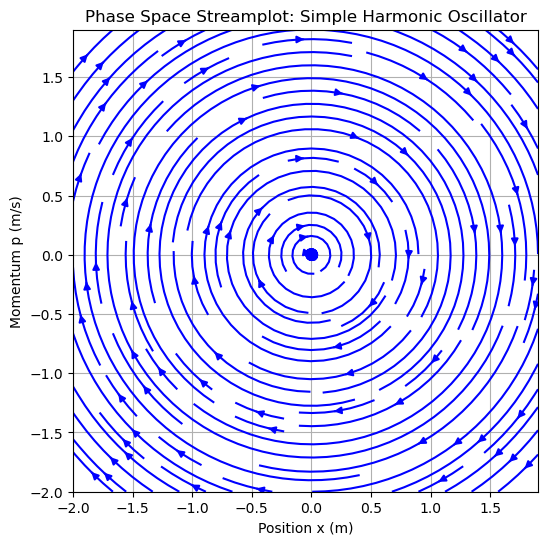

In [213]:
# Define constants
m = 1.0  # Mass of oscillator (kg)
w = 1.0  # Angular frequency (rad/s)

# Create a grid of x and p values
x_values, p_values = np.meshgrid(
    np.arange(-2, 2, 0.1),  # x-axis range for position
    np.arange(-2, 2, 0.1)   # y-axis range for momentum
)

# Calculate derivatives at each point
x_dot = p_values / m  # dx/dt = p / m
p_dot = -m * (w**2) * x_values  # dp/dt = -m * w^2 * x

# Create the phase space plot using streamplot
plt.figure(figsize=(6, 6))
plt.streamplot(x_values, p_values, x_dot, p_dot, color='blue', density=1.2)

# Add labels and title
plt.xlabel('Position x (m)')
plt.ylabel('Momentum p (m/s)')
plt.title('Phase Space Streamplot: Simple Harmonic Oscillator')
plt.grid()

# If desired, you can download the figure on your computer
output_filename = "SHO_phase_space_streamplot.png"
plt.savefig(output_filename, dpi=300, bbox_inches='tight')  # High-resolution image

# Show the plot
plt.show()


## Pendulum

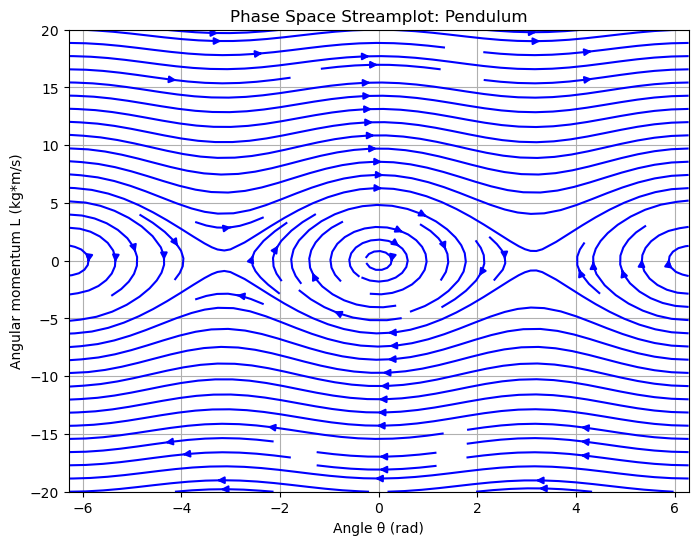

In [217]:
import numpy as np
import matplotlib.pyplot as plt

# Define constants
g = 9.8  # Acceleration due to gravity (m/s^2)
l = 1.0  # Length of pendulum (m)
m = 1.0  # Mass of the pendulum bob (kg)

# Create a grid of theta (angle) and p (angular momentum) values
theta_values, p_values = np.meshgrid(
    np.linspace(-2 * np.pi, 2 * np.pi, 100),  # Angle range (in radians)
    np.linspace(-20, 20, 100)                  # Angular momentum range
)

# Calculate derivatives at each grid point
theta_dot = p_values / (m * l**2)  # d(theta)/dt = p / (mL^2)
p_dot = -m * g * l * np.sin(theta_values)  # d(p)/dt = -m * g * L * sin(theta)

# Create the streamplot
plt.figure(figsize=(8, 6))
plt.streamplot(theta_values, p_values, theta_dot, p_dot, color='blue', density=1.2)

# Add labels and title
plt.xlabel('Angle θ (rad)')
plt.ylabel('Angular momentum L (kg*m/s)')
plt.title('Phase Space Streamplot: Pendulum')
plt.grid()

# If desired, you can download the figure on your computer
output_filename = "pendulum_phase_space_streamplot.png"
#plt.savefig(output_filename, dpi=300, bbox_inches='tight')  # High-resolution image


# Show the plot
plt.show()
